# 군집화(Clustering)

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

### 7.1 K-Means

In [3]:
irisDF = pd.read_csv('data/iris.csv')
del irisDF['Id']
irisDF.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [4]:
from sklearn.preprocessing import LabelEncoder
target = LabelEncoder().fit_transform(irisDF['Species'])
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
del irisDF['Species']
iris_data = irisDF.values
iris_data[:3, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,
                random_state=0)
kmeans.fit(iris_data)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [8]:
irisDF['target'] = target
irisDF['cluster'] = kmeans.labels_

### 군집화 결과를 차원 축소하여 시각화

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris_data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684207,0.326607
1,4.9,3.0,1.4,0.2,0,1,-2.715391,-0.169557
2,4.7,3.2,1.3,0.2,0,1,-2.889820,-0.137346


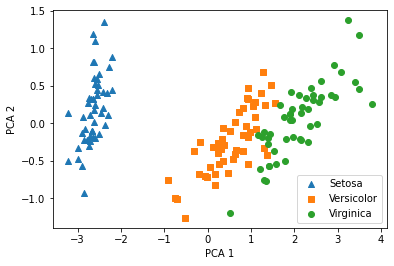

In [10]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']
iris_target_name = ['Setosa', 'Versicolor', 'Virginica']

#pca_x를 x축, pca_y를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['pca_x']
    y_axis_data = irisDF[irisDF['target']==i]['pca_y']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,
                label=iris_target_name[i])

plt.legend()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.savefig('static/images/pca.png')
plt.show()

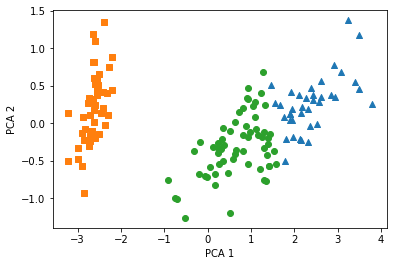

In [11]:
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['cluster']==i]['pca_x']
    y_axis_data = irisDF[irisDF['cluster']==i]['pca_y']
    plt.scatter(x_axis_data, y_axis_data, marker=marker)

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
#plt.savefig('static/images/kmc.png')
plt.show()

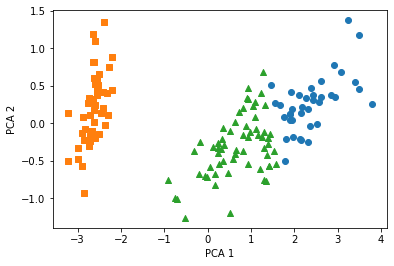

In [12]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.savefig('static/images/kmc.png')
plt.show()